In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet(r'C:\Users\crist\mentoring\comptes\data\raw\data.parquet', engine='auto')

In [4]:
data.head()

,exer,outre_mer,reg_code,reg_name,dep_code,dep_name,epci_code,epci_name,tranche_population,rural,...,ordre_analyse1_section2,ordre_analyse1_section3,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,ordre_affichage
0,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070787.0,CC du Plateau de Lannemezan,2.0,Oui,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
1,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
2,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
3,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
4,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0


DEFINITIONS.

- epci: Établisements publics de coopération intercommunale
- qpv: Quartier de la politique de la ville. (La politique de la ville est une politique de cohésion urbaine et de solidarité envers les quartiers les plus défavorisés. Elle vise à restaurer l'égalité républicaine et à améliorer les conditions de vie des habitants en mobilisant toutes les politiques publiques.)
- Tranche population: répartition de la population par age. 11 tranches.
- Tranche_revenu_imposable_par_habitant: tranche correspondant à des taux d'imposition (Il y en a 5)
- Siren: système informatique pour le répertoire des entreprises et des établissements (unique identifier)
- insee: Le code INSEE (Institute for Statistics)
- ident : quelque sort d'identifiant mais pas connu. Il y en a 84952 différents
- lbudg: localitation budget
- nomen: Nomenclatures comptables
- agregat: Type de mouvement comptable
- ptot: Poblation total
- presence_budget: Il n'y a que la valeur 1. À éliminer?
- cbudg : Il n'y a que les valeurs 1 et 3
- agregat niveau: Il y en a 7 niveau

In [5]:
data.shape

(18120499, 42)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18120499 entries, 0 to 18120498
Data columns (total 42 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   exer                                   int64  
 1   outre_mer                              object 
 2   reg_code                               float64
 3   reg_name                               object 
 4   dep_code                               object 
 5   dep_name                               object 
 6   epci_code                              float64
 7   epci_name                              object 
 8   tranche_population                     float64
 9   rural                                  object 
 10  montagne                               object 
 11  touristique                            object 
 12  tranche_revenu_imposable_par_habitant  float64
 13  qpv                                    object 
 14  com_code                               object 
 

__MISSING ANALISYS__

In [8]:
data.isnull().sum(axis = 0)

exer                                            0
outre_mer                                   12008
reg_code                                    12008
reg_name                                    12326
dep_code                                    12008
dep_name                                    12326
epci_code                                   18145
epci_name                                   18463
tranche_population                          12008
rural                                       12008
montagne                                    12008
touristique                                 12008
tranche_revenu_imposable_par_habitant       12008
qpv                                         12008
com_code                                    12008
com_name                                    12008
categ                                           0
siren                                           0
insee                                       12008
ident                                           0


At first glance, we see that in general the number of missings is not so high, except for the variables ordre_analyse and ordre_affichage. There are some variables that have the same number of missings, which lead us to think in a possible relation between this variables.


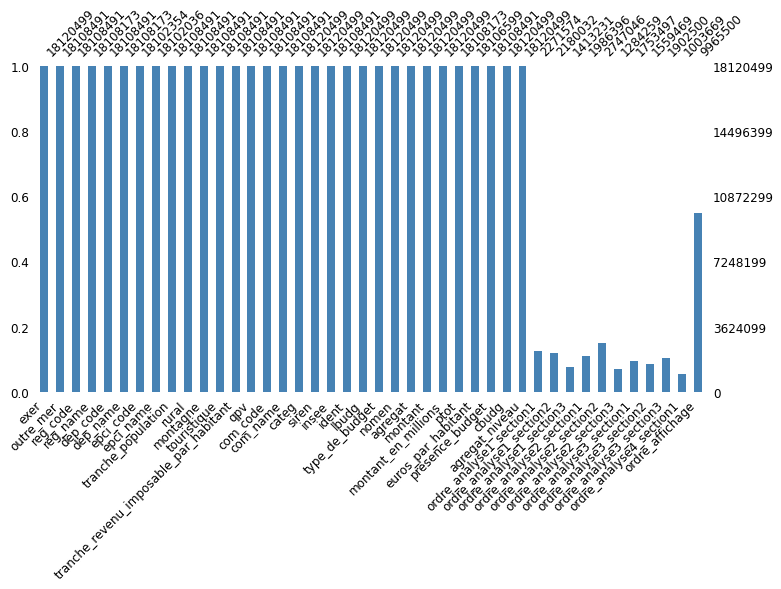

In [9]:
import missingno as msno

msno.bar(data, figsize=(12, 6), fontsize=12, color="steelblue");

We will eliminate the ordre_analyse and ordre_affichage variables because the no missing data is not enough to give us information. Regarding the rest of variables, as the variable "montant" has always information for all instances, we could not eliminate them. 
It seems that there is a relation between most of the misings variables, we are going to see if there is a pattern that allow us to find the missings.

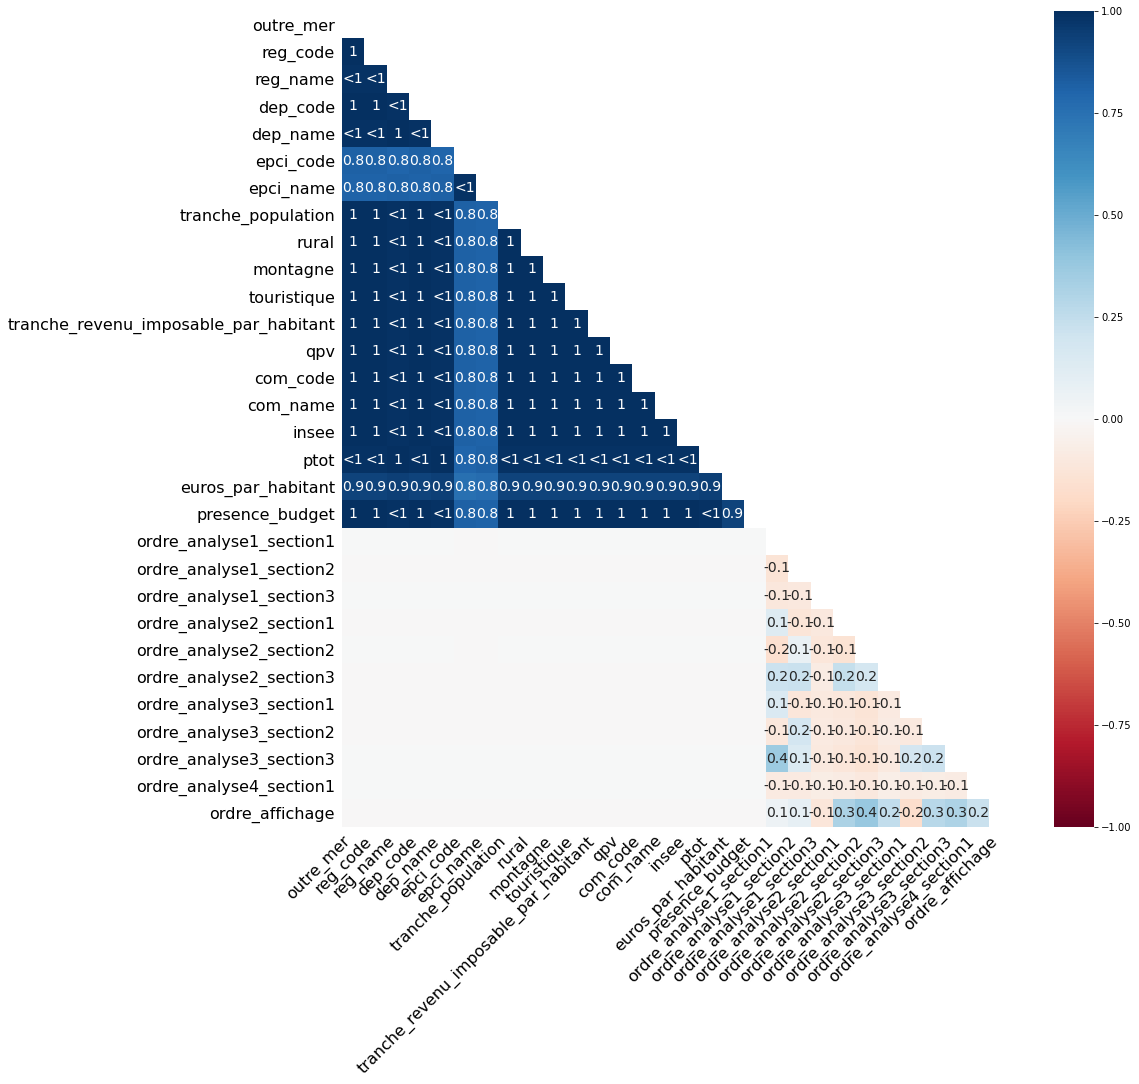

In [11]:
 msno.heatmap(data, figsize=(15, 15));

__CORRELATION__

In order to stusy the lineal relation between variables, firstly we are going to represent the Pearson relation

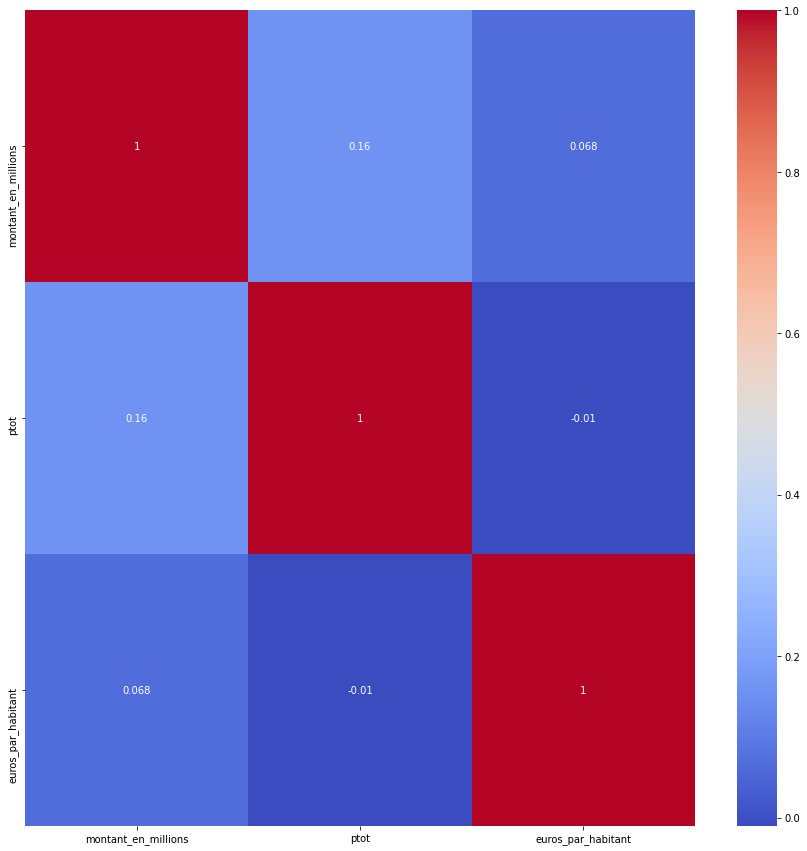

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = data[['montant_en_millions', 'ptot', 'euros_par_habitant']].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm");

As we can see ther is a weak lineal relation

We will check if there is a relation that is not lineal with Spearman

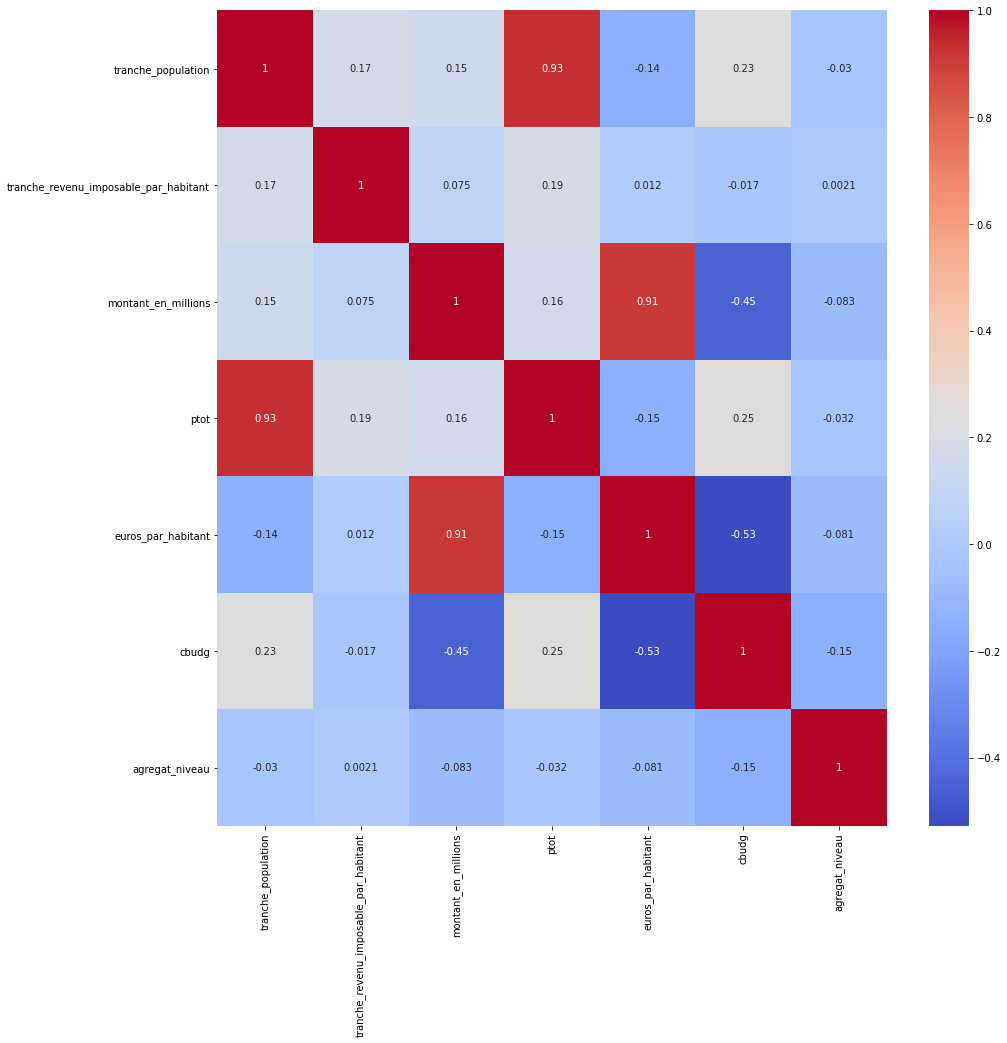

In [15]:
cor = data[['outre_mer', 'tranche_population', 'rural', 'montagne',
       'touristique', 'tranche_revenu_imposable_par_habitant', 'qpv',
       'type_de_budget', 'nomen', 'agregat', 'montant_en_millions',
       'ptot', 'euros_par_habitant', 'cbudg', 'agregat_niveau']].corr('spearman')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm");

We seek for an unsymetric or non-linear relation

C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least

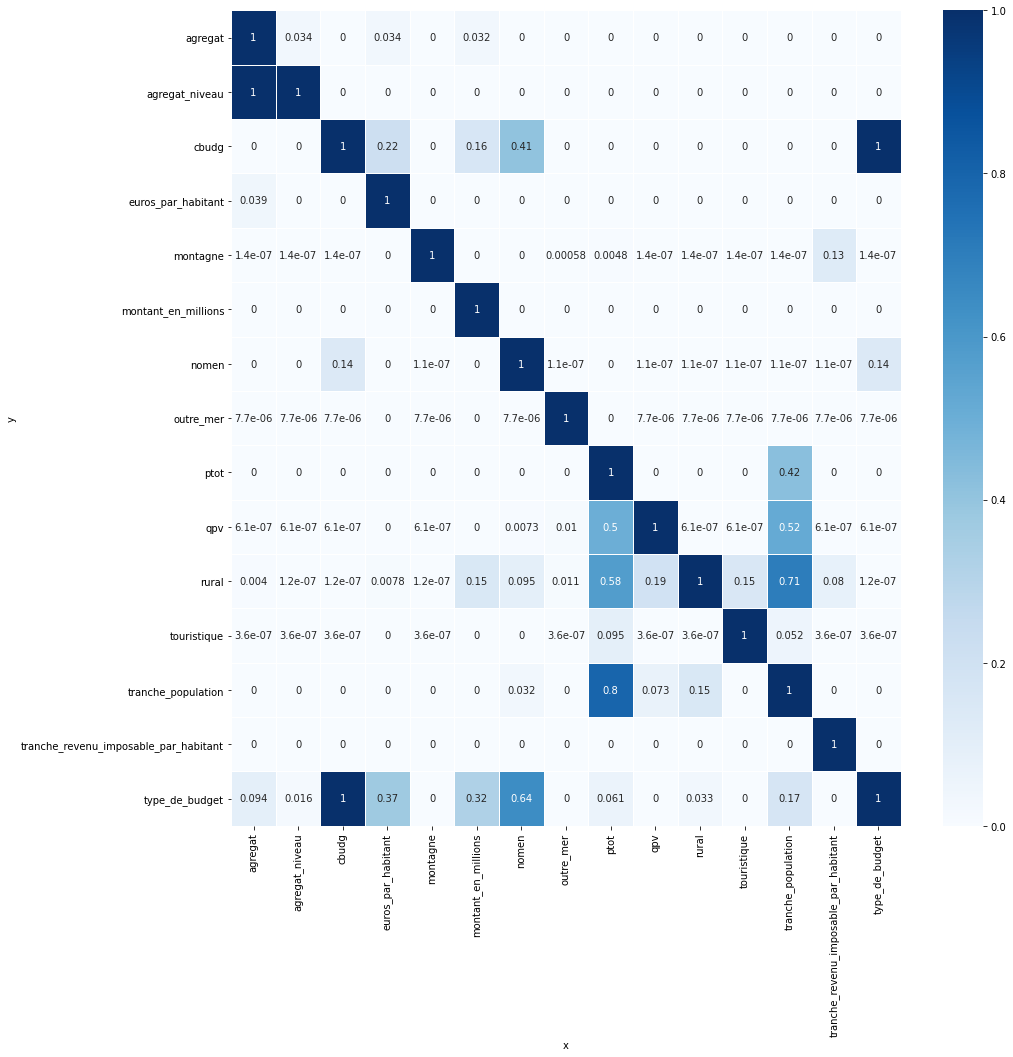

In [4]:
import ppscore as pps
import seaborn as sns
matrix_df = pps.matrix(data[['outre_mer', 'tranche_population', 'rural', 'montagne',
       'touristique', 'tranche_revenu_imposable_par_habitant', 'qpv',
       'type_de_budget', 'nomen', 'agregat', 'montant_en_millions',
       'ptot', 'euros_par_habitant', 'cbudg', 'agregat_niveau']])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True);

We find out that between rural and ptot there is a relation while the reverse is not true. The same happens with qpv and ptot. It is interesting too that rural has a relation with qpv and touristique.
tranche_population has a strong relation with ptot, while ptot has a intermediate relation with this variable. 